<class 'pandas.core.frame.DataFrame'>
Index: 93389 entries, 0 to 93571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   datetime     93389 non-null  object 
 1   Price        93389 non-null  float64
 2   kWh          93389 non-null  float64
 3   Temperature  93372 non-null  float64
 4   Bill         93389 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.3+ MB


,datetime,Price,kWh,Temperature,Bill
0,2015-01-01,3.47,3.670,1.2,12.7
1,2015-01-01,3.40,4.148,1.5,14.1
2,2015-01-01,2.90,4.342,1.6,12.6
3,2015-01-01,2.40,2.095,2.8,5.0
4,2015-01-01,2.19,0.985,3.4,2.2


/var/folders/01/x0nr3mn97vggrqx685hm1fth0000gn/T/ipykernel_841/1867838638.py:65: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


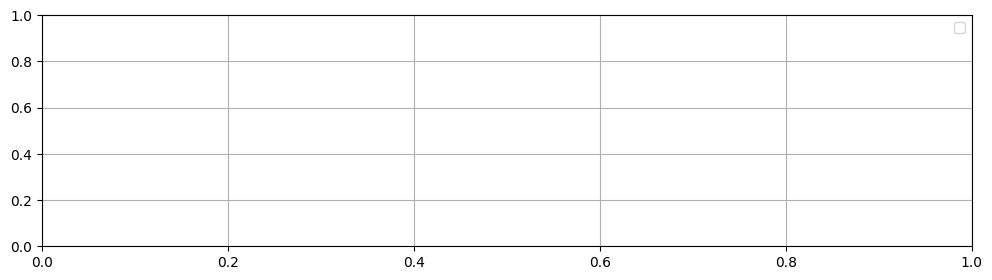

In [ ]:
import pandas as pd

# Read csv files

df_consumption = pd.read_csv('Electricity_consumption_2015-2025.csv')
df_price = pd.read_csv('Electricity_price_2015-2025.csv',delimiter=';')

# Change time format of both files to Pandas datetime
df_consumption['datetime'] = pd.to_datetime(df_consumption['time'], format = '%Y-%m-%d %H:%M:%S')
df_price['datetime'] = pd.to_datetime(df_price['timestamp'], format = '%H:%M %m/%d/%Y')

# Join the two data frames according to time

df_merge = pd.merge(df_consumption,df_price,on='datetime', how='right')
df_merge = df_merge[['datetime', 'Price', 'kWh', 'Temperature']]

#format the price value and drop NA values

df_merge= df_merge.dropna(subset=['Price', 'kWh'])
df_merge["Price"] = df_merge["Price"].str.replace(",",".").astype(float)

df_merge['datetime'] = pd.to_datetime(df_merge['datetime']).dt.date # , '%Y-%m-%d').date()

# Calculate the hourly bill paid (using information about the price and the consumption)

df_merge['Bill'] = (df_merge['Price'] * df_merge['kWh']).astype(float).apply(lambda x: round(x, 1))
df_merge.reset_index()

# Save to a csv file to use it for streamlit
df_merge.to_csv('Electricity_consumption_price.csv', index=False)

